In [1]:
import pandas as pd

In [2]:
data = {
 'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain',
'Overcast', 'Sunny',
 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast',
'Rain'],
 'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild',
 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
 'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal',
'Normal', 'High',
 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
 'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong',
'Strong', 'Weak',
 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
 'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier ,plot_tree

In [6]:
df_encoded = df.copy()
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [7]:
x = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

In [8]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
import matplotlib.pyplot as plt

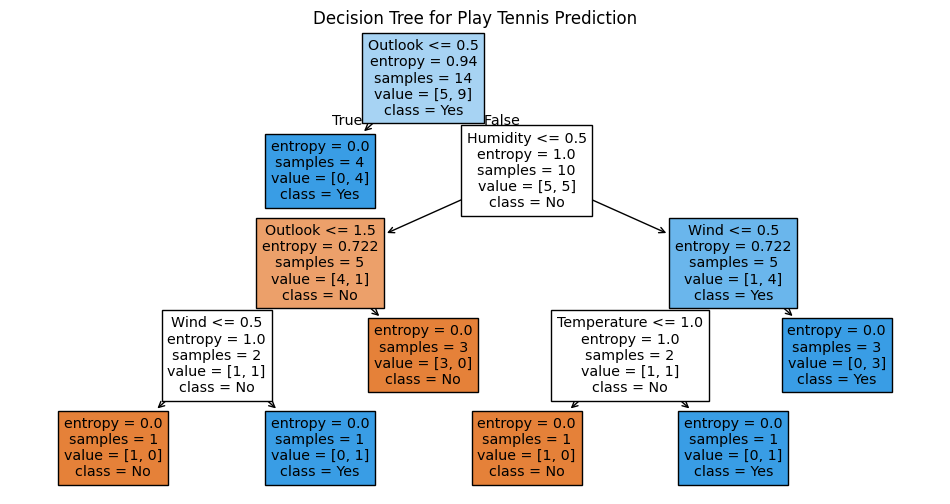

In [10]:
plt.figure(figsize=(12, 6))
plot_tree(model,
          feature_names=x.columns,
          class_names=label_encoders['PlayTennis'].classes_,
          filled=True)

plt.title('Decision Tree for Play Tennis Prediction')
plt.show()

In [16]:
import streamlit as st

In [21]:
st.title("Play Tennis Prediction with 103 Decision Tree")

# User input
st.sidebar.header("Input Weather Conditions")
def user_input():
 outlook = st.sidebar.selectbox("Outlook", df['Outlook'].unique())
 temp = st.sidebar.selectbox("Temperature", df['Temperature'].unique())
 humidity = st.sidebar.selectbox("Humidity", df['Humidity'].unique())
 wind = st.sidebar.selectbox("Wind", df['Wind'].unique())
 return pd.DataFrame([[outlook, temp, humidity, wind]], columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
input_df = user_input()

# Encode input
input_encoded = input_df.copy()
for col in input_encoded.columns:
 input_encoded[col] = label_encoders[col].transform(input_encoded[col])

 # Prediction
prediction = model.predict(input_encoded)[0]
prediction_label = label_encoders['PlayTennis'].inverse_transform([prediction])[0]
st.subheader("Prediction:")
st.success(f"The model predicts: {prediction_label}")
st.subheader("Input Values:")
st.write(input_df)
st.subheader("Training Data:")
st.dataframe(df)

2025-07-28 12:08:06.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:08:06.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()